# Import Numpy Library

In [166]:
import numpy as np

# Linear Regression

In [167]:
class Linear_Regression():
    
    # initiating the parameters
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
    def fit(self, x, y):    
    # number of training examples & number of features
        # m --> no. of training examples
        # n --> no. of features 
        self.m, self.n = x.shape # number of rows and columns
        
    # initiating the weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.x = x
        self.y = y
        
    # implementing the Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()
        
    def update_weights(self):
        y_prediction = self.predict(self.x)
        
        # calculate the gradients
        dw = - (2 * (self.x.T).dot(self.y - y_prediction))/ self.m
        db = - 2 * np.sum(self.y - y_prediction) / self.m
        
        # updating the weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db 
        
    # Line function for prediction
    def predict(self, x):
        return x.dot(self.w) + self.b

# Using Linear Regression Model for Prediction

## Importing the libraries

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data Collection and Pre-Processing

In [169]:
# loading the dataset
salary_data = pd.read_csv("/Users/balogunishaq/Desktop/Complete Machine Learning Course - Siddhardhan/datasets/salary_data.csv")
salary_data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [170]:
# first 5 columns of the DataFrame
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [171]:
# last 5 columns of the DataFrame
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [172]:
# number of rows and column in the DataFrame
salary_data.shape

(30, 2)

In [173]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Splitting the Features and the Target

In [174]:
x = salary_data.iloc[:,:-1].values # Independent Variable (Features)
y = salary_data.iloc[:,1].values # Dependent Variable (Target)

In [175]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [176]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


# Data Splitting

## Splitting Dataset into Training and Testing Data

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2)

# Model Training

In [178]:
# Train & Fit the Model
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000) # learning_rate = 0.02, no_of_iterations = 1000
model.fit(x_train, y_train)

In [179]:
# the parameter values (weight and bias)
print("The weight is - ", model.w[0])
print("The bias is - ", model.b)

The weight is -  9514.400999035135
The bias is -  23697.406507136307


#### y = 9514(x) + 23697
#### salary = 9514(experience) + 23697

# Model Prediction

## Predict the Salary value for Training and Testing Data

In [180]:
# train data
train_pred = model.predict(x_train)

In [181]:
print(train_pred)

[ 51289.16940434 115035.65609787  61755.01050328  44629.08870501
  60803.57040337  72220.85160222 121695.7367972  109327.01549845
  74123.73180202  37969.00800569  54143.48970405 114084.21599797
 106472.69519874  79832.37240144  61755.01050328  98861.17439951
 123598.61699701  62706.45060318  70317.97140241  54143.48970405]


In [182]:
# test data
test_pred = model.predict(x_test)

In [183]:
print(test_pred)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


# Data Visualization

## Visualizing the Actual and Predicted Values

#### Scatterplot for Testing Data

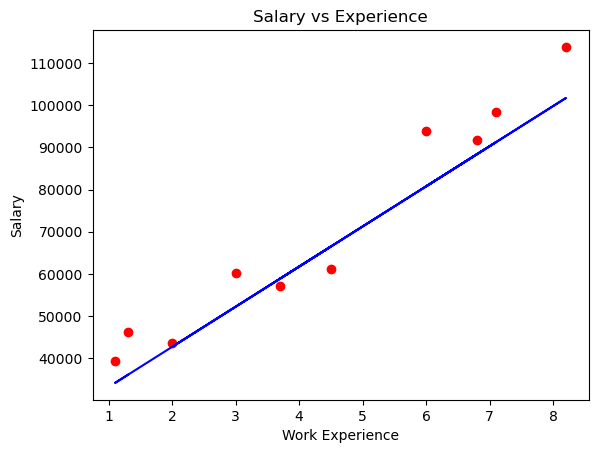

In [184]:
plt.scatter(x_test, y_test, color= 'red')
plt.plot(x_test, test_pred, color= 'blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()

#### Scatterplot for Training Data

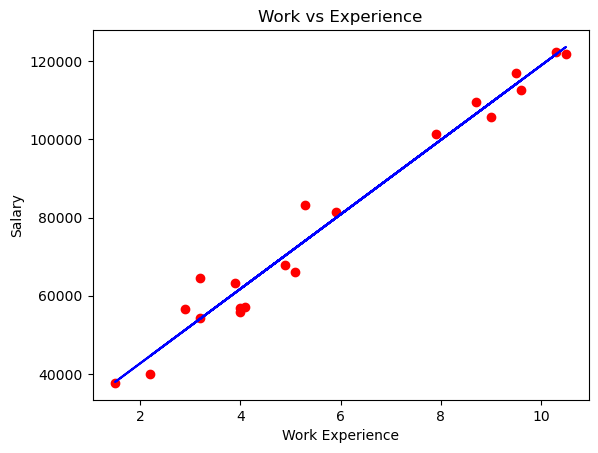

In [186]:
plt.scatter(x_train, y_train, color= "red")
plt.plot(x_train, train_pred, color= "blue")
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Work vs Experience")
plt.show()

<!--  -->